<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/ASSIGNMENT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2


<ipython-input-1-3f6f9446b8f4>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-1-3f6f9446b8f4>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

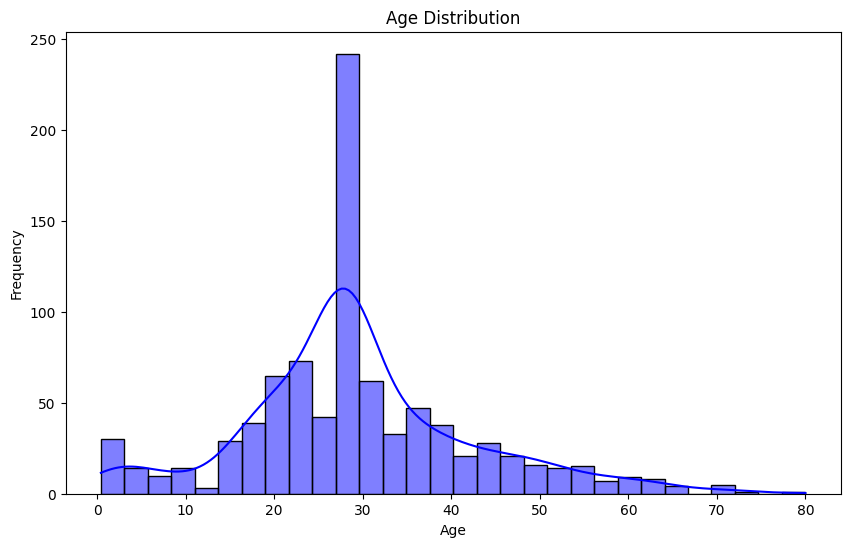

Survival rates (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


<ipython-input-1-3f6f9446b8f4>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None)


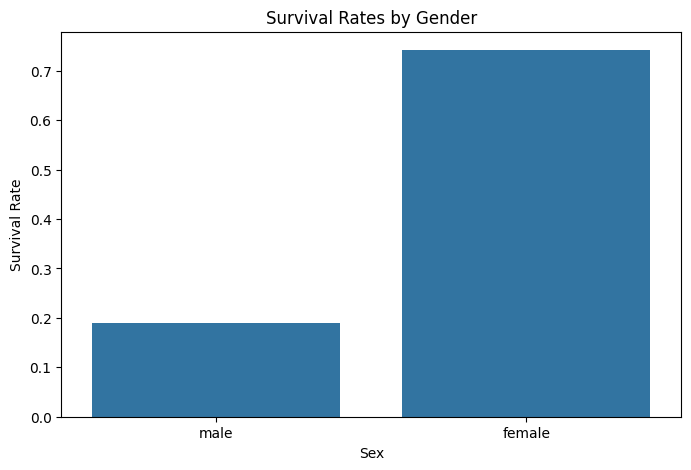

<ipython-input-1-3f6f9446b8f4>:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None)


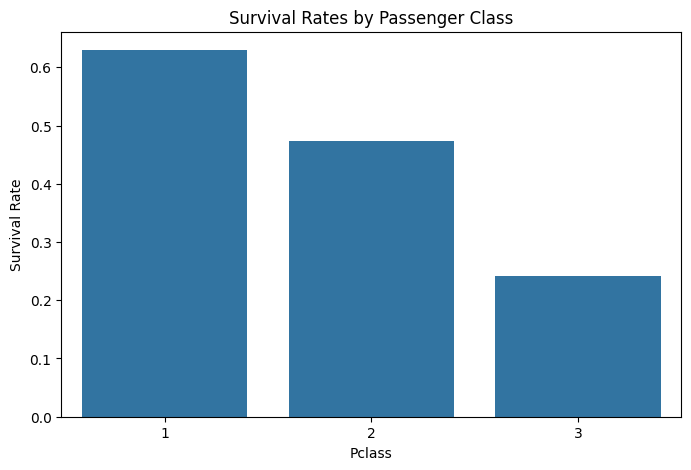

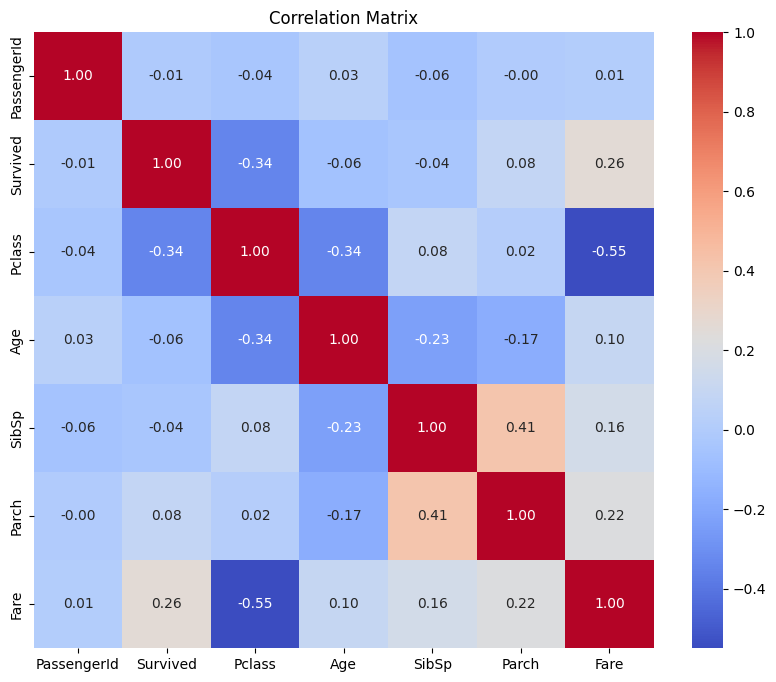

<ipython-input-1-3f6f9446b8f4>:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=data, ci=None)


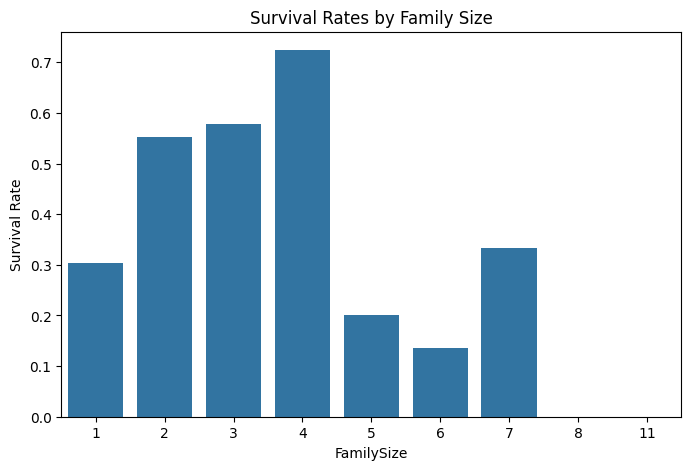

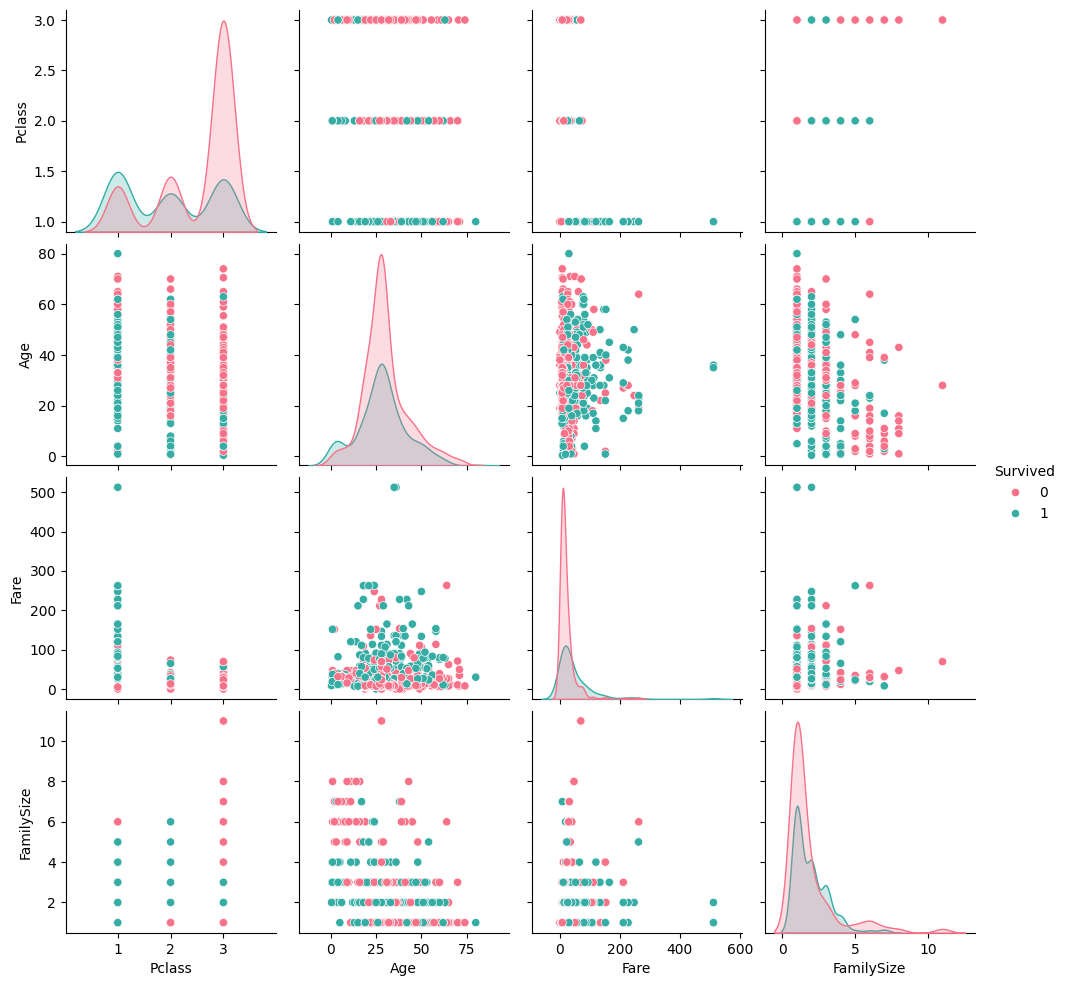

Key Findings:
1. Survival rates are higher for females and passengers in higher classes.
2. Family size influences survival: Medium-sized families had higher survival rates.
3. Features like Fare, Pclass, and FamilySize are significant predictors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Preprocessing
# Load the Titanic dataset (train.csv file from Kaggle)
data_path = '/content/train.csv'
data = pd.read_csv(data_path)

# Display basic dataset info
data.info()

# Display the first few rows
data.head()

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Step 2: Handle Missing Values
# Fill 'Age' with the median, drop 'Cabin' due to excessive missing values, fill 'Embarked' with mode
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing values after cleaning:")
print(data.isnull().sum())

# Step 3: Basic Analysis
# Compute basic statistics
print("Basic statistics:")
print(data.describe())

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival rates
survival_rates = data['Survived'].value_counts(normalize=True) * 100
print("Survival rates (%):")
print(survival_rates)

# Step 4: Intermediate Analysis
# Survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data, ci=None)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rates by class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.title('Survival Rates by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Correlation matrix
#correlation_matrix = data.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix')
#plt.show()



## Error fix for above code
# Correlation matrix
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
##

# Step 5: Feature Engineering
# Create new feature: FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Visualize survival rates by family size
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=data, ci=None)
plt.title('Survival Rates by Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Step 6: Advanced Analysis
# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']
sns.pairplot(data[selected_features], hue='Survived', diag_kind='kde', palette='husl')
plt.show()

# Step 7: Conclusion
# Print key findings
print("Key Findings:")
print("1. Survival rates are higher for females and passengers in higher classes.")
print("2. Family size influences survival: Medium-sized families had higher survival rates.")
print("3. Features like Fare, Pclass, and FamilySize are significant predictors.")
